# Calculer les fréquences des bigrammes d'une lettre dans une chaîne de caractères

In [1]:
POS_A = ord('A')#la position du A
POS_a = ord('a')#la position du a
POS_E = ord('E')#la position du E
POS_O = ord('O')#la position du O
POS_U = ord('U')#la position du U
POS_I = ord('I')#la position du I

NB_CARS = 27 # le nombre de caractères pour les bigrammes


def pos_char(c):
    '''
    Donne la position du caractère dans l'alphabet
    return -1 si le charactère n'est pas une lettre
    '''
    if 'a' <= c <= 'z':
        p = ord(c) - POS_a
    elif 'A' <= c <= 'Z':
        p = ord(c) - POS_A
    elif c in 'éèêÉÊÊ':
        p = POS_E - POS_A
    elif c in 'ôÔ':
        p = POS_O - POS_A
    elif c in 'ûÛùÙ':
        p = POS_U - POS_A
    elif c in 'îÎ':
        p = POS_I - POS_A
    elif c in ' .,:!?;':#ponction
        p = -1
    else:
        p = -2
        
    p = p + 1

    return p

def char_at_pos(p):
    '''
    Donne le caractère à la postion p
    Exemples
    char_at_pos(0)
    >>> " "
    char_at_pos(2)
    >>> "B"
    '''
    if p==0:
        return " "
    else:
        return chr(p+POS_A-1)

def calc_bigrammes(texte):
    
    bigrammes= [[0]*NB_CARS for i in range(NB_CARS)] # nombre d'apparitions de chaque lettre
    N = 0 # compte le nombre total de lettres
    p2 = pos_char(texte[0])
    for car in texte[1:]:
        p1, p2 = p2, pos_char(car) # positions des caractères qui se suivent
        
        # fait des statistiques seulement sur des caractères alphabétiques
        # et la ponctuation
        if p1 != -1 and p2 != -1:
            N = N + 1 # compte le nombre de caractères total du texte
            bigrammes[p1][p2] += 1 # compte le nombre de bigramme (p1,p2)
        
    # Normalisation : calcule les fréquences
    for i in range(NB_CARS):
        for j in range(NB_CARS):
            bigrammes[i][j] = bigrammes[i][j]/N
    
    return bigrammes

### Test de la fonction

In [2]:
# permet de lire le contenu du fichier texte
livre_fichier = open("Notre-Dame_de_Paris.txt", "r")

In [3]:
# permet de mettre le contenu entier du fichier texte dans une unique chaîne de caractères
texte_livre = livre_fichier.read()
texte_livre = texte_livre.replace('\n', ' ')#remplace les sauts à la ligne "\n" par des espaces " ".

In [4]:
livre_fichier.close()

In [5]:
bigrammes_livre = calc_bigrammes(texte_livre)

In [6]:
# transformer la liste en dictionnaire
dic_bigrammes = {}#{chr(k+POS_A) : freq_livre[k] for k in range(NB_CARS)}
for i in range(NB_CARS):
    for j in range(NB_CARS):
        dic_bigrammes[(char_at_pos(i),char_at_pos(j))]= bigrammes_livre[i][j]

In [7]:
dic_bigrammes

{(' ', ' '): 0.03262248163770237,
 (' ', 'A'): 0.008402684104007518,
 (' ', 'B'): 0.0039953297154410525,
 (' ', 'C'): 0.013061887314777783,
 (' ', 'D'): 0.02170030191636806,
 (' ', 'E'): 0.013803330247345764,
 (' ', 'F'): 0.005501385672219765,
 (' ', 'G'): 0.00295871996325022,
 (' ', 'H'): 0.0015262038625550164,
 (' ', 'I'): 0.00361251950569128,
 (' ', 'J'): 0.003020171075867947,
 (' ', 'K'): 7.051767021706346e-06,
 (' ', 'L'): 0.019695585291625826,
 (' ', 'M'): 0.007655196799706647,
 (' ', 'N'): 0.004184720029738309,
 (' ', 'O'): 0.002137692802865838,
 (' ', 'P'): 0.01343966054808348,
 (' ', 'Q'): 0.007045722649973455,
 (' ', 'R'): 0.005337180240142889,
 (' ', 'S'): 0.013711657276063582,
 (' ', 'T'): 0.006519862309211925,
 (' ', 'U'): 0.003761614008435928,
 (' ', 'V'): 0.00510648671900421,
 (' ', 'W'): 2.0147905776303846e-06,
 (' ', 'X'): 8.159901839403058e-05,
 (' ', 'Y'): 0.0006709252623509181,
 (' ', 'Z'): 2.6192277509195002e-05,
 ('A', ' '): 0.009896651317320449,
 ('A', 'A'): 1.00

In [8]:
bigrammes_triees = sorted([(key, value) for key, value in dic_bigrammes.items()],
                      key=lambda x: x[1],
                      reverse = True)
bigrammes_triees 

[(('E', ' '), 0.057268407378566054),
 ((' ', ' '), 0.03262248163770237),
 (('S', ' '), 0.02958518484192457),
 (('T', ' '), 0.02605627914520495),
 ((' ', 'D'), 0.02170030191636806),
 ((' ', 'L'), 0.019695585291625826),
 (('E', 'S'), 0.017492411794987),
 (('L', 'E'), 0.017183141441320736),
 (('R', 'E'), 0.01647393515799484),
 (('D', 'E'), 0.015477621217356614),
 (('E', 'N'), 0.014341279331573078),
 ((' ', 'E'), 0.013803330247345764),
 (('A', 'I'), 0.01378116755099183),
 ((' ', 'S'), 0.013711657276063582),
 ((' ', 'P'), 0.01343966054808348),
 ((' ', 'C'), 0.013061887314777783),
 (('O', 'U'), 0.012327496149231508),
 (('I', 'T'), 0.011940656358326475),
 (('E', 'T'), 0.011831857667134434),
 (('N', 'T'), 0.011739177300563437),
 (('N', ' '), 0.011271745886553186),
 (('T', 'E'), 0.010749915126946917),
 (('A', ' '), 0.009896651317320449),
 (('Q', 'U'), 0.009879525597410592),
 (('E', 'R'), 0.009805985741327083),
 (('O', 'N'), 0.009751586395731062),
 (('R', ' '), 0.009421160740999678),
 (('L', 'A'

### Affichage visuel

In [10]:
import matplotlib.pyplot as plt 

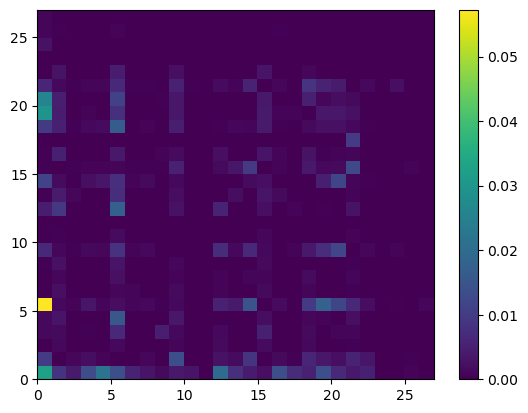

In [14]:
c = plt.pcolor(bigrammes_livre)
plt.colorbar(c) 
plt.show() 

## Cryptanalyse Cesar

In [16]:
def dist_bigrammes(bigramme1, bigramme2):
    ''' calcule la distance euclidienne 
    '''
    dist = 0
    for i in range(NB_CARS):
        for j in range(NB_CARS):
            dist += (bigramme1[i][j] - bigramme2[i][j])**2
    
    return dist**0.5

In [17]:
def cesar_dechiffre(texte_chiffre, k):
    texte_clair= ""
    for lettre in texte_chiffre:
        nb_chiffre = pos_char(lettre)
        nb_clair = (nb_chiffre - k) % 26
        lettre_clair = chr(nb_clair + POS_A)
        texte_clair = texte_clair + lettre_clair
    return texte_clair

In [20]:
def casser_cesar(texte_chiffre):
    
    d_min = 2 # car ||a-b||=(a-b)·(a-b)=||a||+||b||-2 (a·b)=2-2 (a·b)
              # donc toujours plus petit que 2
    cle = 0
    texte_dechiffre_final = texte_chiffre
    for k in range(1,26):
        texte_dechiffre = cesar_dechiffre(texte_chiffre, k)
        bigramme_dechiffre =  calc_bigrammes(texte_dechiffre)
        d = dist_bigrammes(bigramme_dechiffre, bigrammes_livre)
        
        if d < d_min:
            d_min = d
            cle = k
            texte_dechiffre_final = texte_dechiffre
            
    return cle, texte_dechiffre_final

In [21]:
texte_chiffre_01='INKANNWLJPN'
cle, texte_dechiffre = casser_cesar(texte_chiffre_01)
print('La clé pour déchiffrer "', texte_chiffre_01, '" est ', cle, 
      ' et le texte dechiffré est : ', texte_dechiffre)

La clé pour déchiffrer " INKANNWLJPN " est  10  et le texte dechiffré est :  ZEBREENCAGE


In [22]:
texte_chiffre_02='LKDKSVVO'
cle, texte_dechiffre = casser_cesar(texte_chiffre_02)
print('La clé pour déchiffrer "', texte_chiffre_02, '" est ', cle, 
      ' et le texte dechiffré est : ', texte_dechiffre)

La clé pour déchiffrer " LKDKSVVO " est  11  et le texte dechiffré est :  BATAILLE


In [23]:
texte_chiffre_03='REYPKENA'
cle, texte_dechiffre = casser_cesar(texte_chiffre_03)
print('La clé pour déchiffrer "', texte_chiffre_03, '" est ', cle, 
      ' et le texte dechiffré est : ', texte_dechiffre)

La clé pour déchiffrer " REYPKENA " est  23  et le texte dechiffré est :  VICTOIRE


## Cryptanalyse Affine

In [24]:
def find_inverse_Z26(x):
    '''
      Si l'inverse n'existe pas, 0 est retourné
    '''
    for k in range(1,26):
        r = (x * k) % 26
        if r == 1:
            return k
    return 0

In [25]:
def affine_dechiffre(texte_chiffre,a,b):
    
    inverse = find_inverse_Z26(a)     # c est l'inverse de a mod 26
            
    texte_clair= ""
    for lettre in texte_chiffre:               # Boucle
        nb_chiffre = pos_char(lettre)              # Bijection b
        nb_clair = inverse*(nb_chiffre-b)%26      # Fonction de dechiffrement
        lettre_clair = chr(nb_clair + POS_A)          # Bijection b^-1
        texte_clair = texte_clair + lettre_clair   
    return texte_clair

In [26]:
affine_dechiffre('LCRCWXXM',9,2)

'EDWDLOOH'

In [27]:
# tous les éléments qui possède une inverse dans Z26
INV_Z26 = [find_inverse_Z26(k) for k in range(26) if find_inverse_Z26(k)!=0]
INV_Z26

[1, 9, 21, 15, 3, 19, 7, 23, 11, 5, 17, 25]

In [28]:
def casser_affine(texte_chiffre):
    
    d_min = 2 # car ||a-b||=(a-b)·(a-b)=||a||+||b||-2 (a·b)=2-2 (a·b)
              # donc toujours plus petit que 2
    cle = (1,0)
    texte_dechiffre_final = texte_chiffre
    for a in INV_Z26:
        for b in range(1,26):
            texte_dechiffre = affine_dechiffre(texte_chiffre, a,b)
            bigramme_dechiffre =  calc_bigrammes(texte_dechiffre)
            d = dist_bigrammes(bigramme_dechiffre, bigrammes_livre)
            
            if d < d_min:
                d_min = d
                cle = (a,b)
                texte_dechiffre_final = texte_dechiffre
                # print((a,b), texte_dechiffre, d)
            
    return cle, texte_dechiffre_final

In [29]:
casser_affine('LCRCWXXM')

((9, 3), 'BATAILLE')

In [30]:
casser_affine('OIDABZVQVTEMDTGDZNUV')

((11, 4), 'BRAVOCENESTPASFACILE')

In [31]:
casser_affine('CJLZBBNAKJBJAUBFCFUNFWJJVUYWJU')

((25, 14), 'LECOMMANDEMENTMILITAIREESTPRET')